# CSE 432 Midterm Report - Owen Fankhauser

## Imports & Setup

Import appropriate Libraries.

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import re

Save global values.

In [150]:
# Sensor Frequencies
AcceleratorHz = 100
GyroscopeHz = 100
MagnetometerHZ = 20
PressureSensorHz = 7

# We know how many files should be in this data package
expectedFileCount = 520

## Data Preparation

### 1. Load data

Data paths are gathered using glob, parsed into individial reads, and appended into an array. The array is then parsed into a DataFrame "df". The file path is collected as data as well for later use. This data is declared globally. *7-8 seconds to complete.*

In [151]:
filePaths = glob.glob("CourseProjectDataSet1/**/*.csv", recursive=True)

dataList = []
for file in filePaths:
    df = pd.read_csv(file)
    df["file_path"] = file # stored for later
    dataList.append(df)

data = pd.concat(dataList, ignore_index=True)

### 2. Extract Metadata

This function uses to Regex to parse individual file names into metadata that is appended to the DataFrame. *3-4 minutes to complete.*

In [152]:
def extractMetadata(filePaths):
    # Divvy up the file name and search using Regex for groups.
    fileName = os.path.basename(filePaths)
    fileName
    pattern = r"([\w]+)_([\w]+)_(\d{4}-\d{2}-\d{2})T([\d.]+)_(\w+)_([\w]+)_(\d+\.\d+)Hz"
    match = re.search(pattern, fileName)

    # Extract user from the path since it won't match the Regex search.
    user = filePaths.split(os.sep)[2]  
    
    # Only returns if there is a match. Otherwise stop program.
    if match:
        expID = match.group(1)  # Experiment ID
        device = match.group(2)  # Irrelevant data
        date = match.group(3)  # Date
        time = match.group(4) # Time
        sensor_type = match.group(6)  # Sensor type (Accelerometer, etc)
        frequency = float(match.group(7))  # Frequency in Hz
        
        return pd.Series([expID, date, time, frequency, sensor_type, user])
    else :
        raise Exception("Incorrect file name: " + fileName)
    
# Iterate through all file paths and extract data. 
data[["expID", "date", "time", "frequency", "sensor_type", "user"]] = data["file_path"].apply(extractMetadata)

### 3. Data Verification

First, make sure all files are accounted for. We know there are 520 files in this particular example. We also can check if there are more than 520 files present to eliminate duplicate files. Our expected file count can be changed to fit other data, or set to -1 to disable this check.
 *Later iterations may include a menu on start up to enter how many files we expect to add to the dataset*

In [153]:
if expectedFileCount > 0 :
    if len(filePaths) < expectedFileCount or len(filePaths) > expectedFileCount:
        raise Exception((filePaths) + " files found. Expected: " + expectedFileCount + " files.")
data

,epoch (ms),time (-13:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g),file_path,x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),x-axis (T),y-axis (T),z-axis (T),pressure (Pa),expID,date,time,frequency,sensor_type,user
0,1568482903468,2019-09-14T13:41:43.468,0.000,0.715,0.742,-0.200,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1
1,1568482903478,2019-09-14T13:41:43.478,0.010,0.722,0.755,-0.201,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1
2,1568482903488,2019-09-14T13:41:43.488,0.020,0.718,0.766,-0.197,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1
3,1568482903498,2019-09-14T13:41:43.498,0.030,0.709,0.788,-0.196,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1
4,1568482903508,2019-09-14T13:41:43.508,0.040,0.696,0.798,-0.196,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414945,1574109094723,2019-11-18T15:31:34.723,36.365,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,NaN,NaN,NaN,97507.094,99,2019-11-18,15.30.58.254,7.33,Pressure,User9
3414946,1574109094859,2019-11-18T15:31:34.859,36.501,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,NaN,NaN,NaN,97513.609,99,2019-11-18,15.30.58.254,7.33,Pressure,User9
3414947,1574109094994,2019-11-18T15:31:34.994,36.636,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,NaN,NaN,NaN,97513.125,99,2019-11-18,15.30.58.254,7.33,Pressure,User9
3414948,1574109095130,2019-11-18T15:31:35.130,36.772,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,NaN,NaN,NaN,97510.516,99,2019-11-18,15.30.58.254,7.33,Pressure,User9


### 4. Map Activity Lables

Create an activities DataFrame to merge with the existing data DataFrame. It will be used to map expid to activities to activity number and type. *ChatGPT and Gemini were both used on this step to shorten the lengthy process of writing all of this data out as well as to double check for accuracy against the Data Collection Sheet.*

First, build the Data Colelction Sheet Database (AI assisted) 

In [154]:
activity_data = { # New array to record Data Collection Sheet data
    'expID': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, "Missing", 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, "Missing", 127, 128, "Missing", 130, 131, 132
    ],
    'Activity No.': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
    ],
    'Activity Type': [
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing",
        "Sitting", "Sitting", "Using computer", "Using computer", "While sitting", "While sitting", "Sitting", "Standing", "Missing", "Missing", "Missing"
    ],
    'Activity Details': [
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs",
        "Reading a book", "Writing on a notebook", "Typing", "Browsing", "Moving head, body", "Moving chair", "Stand up from sitting", "Standing", "Walking", "Running", "Taking stairs"
    ]
}

Second, clean up the Data, make it a DataFrame, and merge it with the existing DataFrame. *7-8 seconds to complete.*

In [155]:
# Make sure all rows are equal
max_length = max(len(activity_data[key]) for key in activity_data)

# Clean up missing Activity Type data
for key in activity_data:
    while len(activity_data[key]) < max_length:
        activity_data[key].append(None)  # Add None for missing values

# Convert to DataFrame and clean up missing data
activity_df = pd.DataFrame(activity_data)
activity_df.replace("Missing", None, inplace=True) # Replace "missing" with None

# Confirms expIDs are all strings in both DataFrames
data['expID'] = data['expID'].astype(str)
activity_df['expID'] = activity_df['expID'].astype(str)


# Finally, merge based on expIDs
data = data.merge(activity_df, on='expID', how='left')

# Clean up duplicate columns created in merge

# TODO Figure out why these duplicate generate. Merge Left Failure? #

data = data.rename(columns={'Activity No._y': 'Activity No.',
                            'Activity Type_y': 'Activity Type',
                            'Activity Details_y': 'Activity Details',
                            'Activity No._x': 'Activity No.',
                            'Activity Type_x': 'Activity Type',
                            'Activity Details_x': 'Activity Details',
                            'Activity No._activity': 'Activity No.',
                            'Activity Type_activity': 'Activity Type',
                            'Activity Details_activity': 'Activity Details'
                            })
data = data.loc[:, ~data.columns.duplicated()]
data

,epoch (ms),time (-13:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g),file_path,x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),...,pressure (Pa),expID,date,time,frequency,sensor_type,user,Activity No.,Activity Type,Activity Details
0,1568482903468,2019-09-14T13:41:43.468,0.000,0.715,0.742,-0.200,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,...,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1,1.0,Sitting,Reading a book
1,1568482903478,2019-09-14T13:41:43.478,0.010,0.722,0.755,-0.201,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,...,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1,1.0,Sitting,Reading a book
2,1568482903488,2019-09-14T13:41:43.488,0.020,0.718,0.766,-0.197,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,...,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1,1.0,Sitting,Reading a book
3,1568482903498,2019-09-14T13:41:43.498,0.030,0.709,0.788,-0.196,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,...,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1,1.0,Sitting,Reading a book
4,1568482903508,2019-09-14T13:41:43.508,0.040,0.696,0.798,-0.196,CourseProjectDataSet1\DataSet1\User1\1_MetaWea...,NaN,NaN,NaN,...,NaN,1,2019-09-14,13.41.43.335,100.00,Accelerometer,User1,1.0,Sitting,Reading a book
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414945,1574109094723,2019-11-18T15:31:34.723,36.365,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,...,97507.094,99,2019-11-18,15.30.58.254,7.33,Pressure,User9,11.0,None,Taking stairs
3414946,1574109094859,2019-11-18T15:31:34.859,36.501,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,...,97513.609,99,2019-11-18,15.30.58.254,7.33,Pressure,User9,11.0,None,Taking stairs
3414947,1574109094994,2019-11-18T15:31:34.994,36.636,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,...,97513.125,99,2019-11-18,15.30.58.254,7.33,Pressure,User9,11.0,None,Taking stairs
3414948,1574109095130,2019-11-18T15:31:35.130,36.772,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\99_MetaWe...,NaN,NaN,NaN,...,97510.516,99,2019-11-18,15.30.58.254,7.33,Pressure,User9,11.0,None,Taking stairs


## Data Analysis & Sensor Data Visualization

### 1. Organize Data by Activity

First create the Main_DataFrame, then isolate activity-based DataFrames and put them in a dictionary.

In [156]:
# Copy data into "Main_DataFrame" as requested
Main_DataFrame = data

# Find activities by group
activity_groups = Main_DataFrame.groupby('Activity Type')

# Create separate DataFrames for each activity type and store them
activity_dataframes = {activity: group for activity, group in activity_groups}

# Demonstration: 
activity_df = activity_dataframes.get('Using computer', None)
activity_df

,epoch (ms),time (-13:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g),file_path,x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),...,pressure (Pa),expID,date,time,frequency,sensor_type,user,Activity No.,Activity Type,Activity Details
34679,1568483294077,2019-09-14T13:48:14.077,0.000,0.486,1.065,-0.030,CourseProjectDataSet1\DataSet1\User1\3_MetaWea...,NaN,NaN,NaN,...,NaN,3,2019-09-14,13.48.13.875,100.00,Accelerometer,User1,3.0,Using computer,Typing
34680,1568483294087,2019-09-14T13:48:14.087,0.010,0.490,1.051,-0.028,CourseProjectDataSet1\DataSet1\User1\3_MetaWea...,NaN,NaN,NaN,...,NaN,3,2019-09-14,13.48.13.875,100.00,Accelerometer,User1,3.0,Using computer,Typing
34681,1568483294097,2019-09-14T13:48:14.097,0.020,0.484,1.022,-0.025,CourseProjectDataSet1\DataSet1\User1\3_MetaWea...,NaN,NaN,NaN,...,NaN,3,2019-09-14,13.48.13.875,100.00,Accelerometer,User1,3.0,Using computer,Typing
34682,1568483294107,2019-09-14T13:48:14.107,0.030,0.465,0.991,-0.021,CourseProjectDataSet1\DataSet1\User1\3_MetaWea...,NaN,NaN,NaN,...,NaN,3,2019-09-14,13.48.13.875,100.00,Accelerometer,User1,3.0,Using computer,Typing
34683,1568483294117,2019-09-14T13:48:14.117,0.040,0.433,0.979,-0.018,CourseProjectDataSet1\DataSet1\User1\3_MetaWea...,NaN,NaN,NaN,...,NaN,3,2019-09-14,13.48.13.875,100.00,Accelerometer,User1,3.0,Using computer,Typing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196978,1574107638219,2019-11-18T15:07:18.219,186.448,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\92_MetaWe...,NaN,NaN,NaN,...,97509.656,92,2019-11-18,15.04.11.666,7.33,Pressure,User9,4.0,Using computer,Browsing
3196979,1574107638354,2019-11-18T15:07:18.354,186.583,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\92_MetaWe...,NaN,NaN,NaN,...,97508.352,92,2019-11-18,15.04.11.666,7.33,Pressure,User9,4.0,Using computer,Browsing
3196980,1574107638490,2019-11-18T15:07:18.490,186.719,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\92_MetaWe...,NaN,NaN,NaN,...,97510.969,92,2019-11-18,15.04.11.666,7.33,Pressure,User9,4.0,Using computer,Browsing
3196981,1574107638626,2019-11-18T15:07:18.626,186.855,NaN,NaN,NaN,CourseProjectDataSet1\DataSet1\User9\92_MetaWe...,NaN,NaN,NaN,...,97508.352,92,2019-11-18,15.04.11.666,7.33,Pressure,User9,4.0,Using computer,Browsing


### 2. Generate Sensor Plots

This function allows you to plot any combination of user and activity data sets on all four sensor options. *5-6 minutes to complete.*

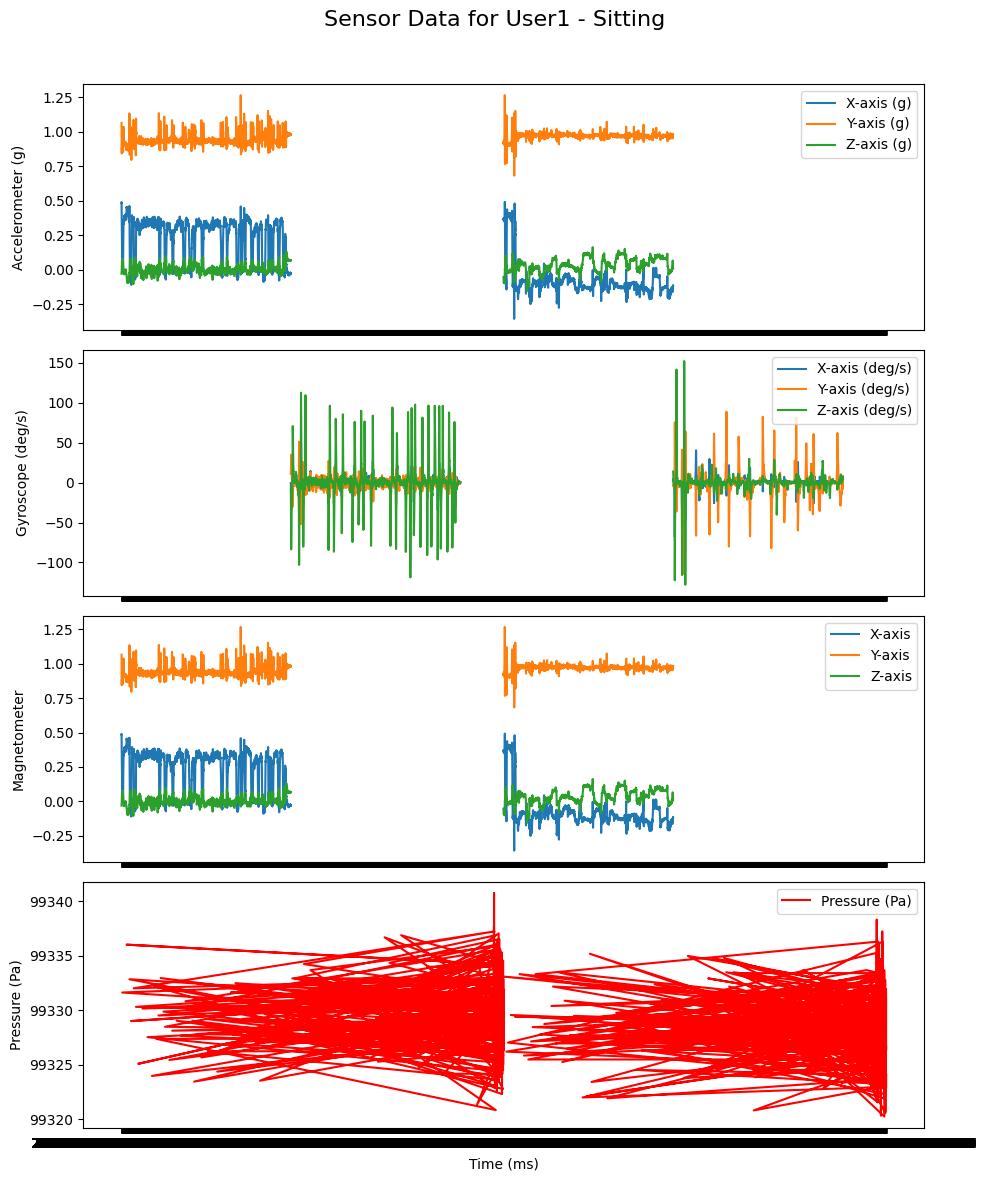

In [157]:
def plot_sensors(user_df, user_name, activity_name):
    # Create 4 plots in 1, with time being the X-axis on all of them
    fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
    fig.suptitle(f"Sensor Data for {user_name} - {activity_name}", fontsize=16)

    # Plot Accelerometer (X, Y, Z)
    axs[0].plot(user_df['time (-13:00)'], user_df['x-axis (g)'], label='X-axis (g)')
    axs[0].plot(user_df['time (-13:00)'], user_df['y-axis (g)'], label='Y-axis (g)')
    axs[0].plot(user_df['time (-13:00)'], user_df['z-axis (g)'], label='Z-axis (g)')
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].legend(loc='upper right')

    # Plot Gyroscope (X, Y, Z)
    axs[1].plot(user_df['time (-13:00)'], user_df['x-axis (deg/s)'], label='X-axis (deg/s)')
    axs[1].plot(user_df['time (-13:00)'], user_df['y-axis (deg/s)'], label='Y-axis (deg/s)')
    axs[1].plot(user_df['time (-13:00)'], user_df['z-axis (deg/s)'], label='Z-axis (deg/s)')
    axs[1].set_ylabel('Gyroscope (deg/s)')
    axs[1].legend(loc='upper right')

    # Plot Magnetometer (X, Y, Z)
    axs[2].plot(user_df['time (-13:00)'], user_df['x-axis (g)'], label='X-axis')
    axs[2].plot(user_df['time (-13:00)'], user_df['y-axis (g)'], label='Y-axis')
    axs[2].plot(user_df['time (-13:00)'], user_df['z-axis (g)'], label='Z-axis')
    axs[2].set_ylabel('Magnetometer')
    axs[2].legend(loc='upper right')

    # Plot Pressure Sensor (Pa)
    axs[3].plot(user_df['time (-13:00)'], user_df['pressure (Pa)'], label='Pressure (Pa)', color='r')
    axs[3].set_ylabel('Pressure (Pa)')
    axs[3].set_xlabel('Time (ms)')
    axs[3].legend(loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

# Demonstration: 
user_data = activity_df[activity_df['user'] == 'User1']
plot_sensors(user_data, 'User1', 'Sitting')

### Windowing & Feature Extraction

First, define what features we want to window (mean, median, standard dev, etc.).

In [158]:
windowSizes = [100, 200, 300, 400, 500]
overlaps = [0.0, 0.5]  # 0% overlap, 50% overlap
activities = ['Sitting', 'Walking', 'Running']  # Example activity types

# This function calculates features for each window
def calculateFeatures(data, sensorType):
    features = {}
    if sensorType != 'Accelerometer' and sensorType != 'Gyroscope':
        return features  # Only two sensors possible

    # For Accelerometer, use 'x-axis (g)', 'y-axis (g)', 'z-axis (g)'
    if sensorType == 'Accelerometer':
        axes = ['x-axis (g)', 'y-axis (g)', 'z-axis (g)']
    # For Gyroscope, use 'x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)'
    elif sensorType == 'Gyroscope':
        axes = ['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']

    for axis in axes:
        if axis in data.columns:
            sensor_data = data[axis]

            # Calculate features
            features[f'mean_{sensorType.lower()}_{axis}'] = np.mean(sensor_data)
            features[f'var_{sensorType.lower()}_{axis}'] = np.var(sensor_data)
            features[f'median_{sensorType.lower()}_{axis}'] = np.median(sensor_data)
            features[f'std_{sensorType.lower()}_{axis}'] = np.std(sensor_data)
            features[f'min_{sensorType.lower()}_{axis}'] = np.min(sensor_data)
            features[f'max_{sensorType.lower()}_{axis}'] = np.max(sensor_data)
            features[f'range_{sensorType.lower()}_{axis}'] = np.max(sensor_data) - np.min(sensor_data)
            features[f'{sensorType.lower()}_sum_xyz'] = np.sum(sensor_data)
            features[f'{sensorType.lower()}_abssum'] = np.sum(np.abs(sensor_data))

    return features

Second, create a function to extract the appropriate features.

In [159]:
def extractFeatures(df, windowSize, overlapPercentage, sensorType):
    # Define the step size based on overlap
    stepSize = int(windowSize * (1 - overlapPercentage))
    featureData = []

    # Loop through the DataFrame in windows
    for start in range(0, len(df) - windowSize + 1, stepSize):
        end = start + windowSize
        windowData = df.iloc[start:end]

        # Check if the window contains data
        if windowData.empty:
            continue

        # Extract sensor data for Accelerometer or Gyroscope
        if sensorType == 'Accelerometer':
            sensorColumns = ['x-axis (g)', 'y-axis (g)', 'z-axis (g)']
        elif sensorType == 'Gyroscope':
            sensorColumns = ['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']
        else:
            raise ValueError(f"Unknown sensor type: {sensorType}")

        # Ensure the columns exist in the DataFrame
        if not all(col in windowData.columns for col in sensorColumns):
            print(f"Missing columns: {sensorColumns} in the current window.")
            continue

        # Extract the relevant columns for the window
        window_sensor_data = windowData[sensorColumns]

        # Calculate the features for the current window
        features = calculateFeatures(window_sensor_data, sensorType)
        
        # Extract the activity type for the current window
        activity_type = windowData['Activity Type'].iloc[0]
        features['Activity Type'] = activity_type

        # Add features to the list
        featureData.append(features)

    # Create a DataFrame from the list of features
    feature_df = pd.DataFrame(featureData)

    return feature_df

Loop through each window option and extract data, then calculate features using the above functions. Save the .csv files. *9-10 minutes to complete.*

In [160]:
# Loop through different window sizes and overlaps
for windowSize in windowSizes:
    for overlap in overlaps:
        overlapStr = f"{int(overlap * 100)}"
        # Extract features for accelerometer and gyroscope
        accelerometerData = extractFeatures(Main_DataFrame, windowSize, overlap, 'Accelerometer')
        gyroscopeData = extractFeatures(Main_DataFrame, windowSize, overlap, 'Gyroscope')
        
        # Save feature data to files
        featureFilename = f"Feature_W{windowSize}_Olap{overlapStr}.csv"
        featureData = pd.concat([accelerometerData, gyroscopeData], axis=1)
        featureData.to_csv(featureFilename, index=False)
        
        # Display the first 10 rows of feature files
        print(f"First 10 rows of {featureFilename}:")
        print(featureData.head(10))
        
        # Display the number of rows per file
        print(f"Number of rows in {featureFilename}: {len(featureData)}")
        print("\n" + "-" * 50)

First 10 rows of Feature_W100_Olap0.csv:
   mean_accelerometer_x-axis (g)  var_accelerometer_x-axis (g)  \
0                        0.53310                      0.004875   
1                        0.51647                      0.000039   
2                        0.50770                      0.000074   
3                        0.49277                      0.000125   
4                        0.45140                      0.000155   
5                        0.49093                      0.000612   
6                        0.47474                      0.000809   
7                        0.57673                      0.005090   
8                        0.59283                      0.000564   
9                        0.53161                      0.004433   

   median_accelerometer_x-axis (g)  std_accelerometer_x-axis (g)  \
0                           0.5300                      0.069820   
1                           0.5160                      0.006244   
2                           

Create a short summary table to summarize the 10 files generated. 

In [161]:
summaryTable = []
for windowSize in windowSizes:
    for overlap in overlaps:
        overlapStr = f"{int(overlap * 100)}"
        featureFilename = f"Feature_W{windowSize}_Olap{overlapStr}.csv"
        featureData = pd.read_csv(featureFilename)
        summaryTable.append({
            'Window Size': windowSize,
            'Overlap': f"{int(overlap * 100)}%",
            'Rows': len(featureData)
        })
summary_df = pd.DataFrame(summaryTable)
print("Summary of Number of Rows in Each Feature File:")
print(summary_df)


Summary of Number of Rows in Each Feature File:
   Window Size Overlap   Rows
0          100      0%  34149
1          100     50%  68298
2          200      0%  17074
3          200     50%  34148
4          300      0%  11383
5          300     50%  22765
6          400      0%   8537
7          400     50%  17073
8          500      0%   6829
9          500     50%  13658


## Observations

This dataset came with a handful of helpful assumptions. For instance, the Data Collection Sheet had little error and showed consistancy in how the test were conducted. I do not detect any immediate evidence that there was poor sensor calibration or any kind of drift in results, meaning data was collected consistently. Any other missing data was at a sensor level, not at a human error level. This leads us to some insightful and interesting observations like the correlations between *Accelerometer* and *Gyroscope* readings. We can see precisely when an activity begins and ends. This detection of actions is useful in situations where timings are impactful to final results, such as recognizing when a car arrives at a stoplight for example. The different activities and patterns of users also showed how different users complete different tasks. We can also accurately predict average accelerations and speeds of walking, running, or other activities.